In [8]:
## Import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [52]:
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.express as px

# Cufflinks wrapper on plotly
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#Specify offline plotly mode
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [9]:
## Import dataset
cor = pd.read_csv('covid_19_clean_complete.csv')
cor.head()

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   
2            NaN        Algeria  28.0339   1.6596  1/22/20          0       0   
3            NaN        Andorra  42.5063   1.5218  1/22/20          0       0   
4            NaN         Angola -11.2027  17.8739  1/22/20          0       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [5]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
Province/State    6080 non-null object
Country/Region    19836 non-null object
Lat               19836 non-null float64
Long              19836 non-null float64
Date              19836 non-null object
Confirmed         19836 non-null int64
Deaths            19836 non-null int64
Recovered         19836 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [11]:
## Check for missing values
cor.isna().sum()

## Fill the missing values in Province/State with empty strings
## We also create a new column which shows the number of active cases
## Replace mainland china in country/province with just china to remove ambiguity
## Also change date column to a datetime object
cor['Province/State'] = cor['Province/State'].fillna('')
cor['Active'] = cor['Confirmed']-cor['Deaths']-cor['Recovered']
cor['Country/Region'] = cor['Country/Region'].replace('Mainland China', 'China')
cor['Date'] = pd.to_datetime(cor['Date'])

Province/State    13756
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [218]:
##cor[cor['Confirmed']>100].sample(frac=1).head(10)

Province/State              Country/Region       Lat      Long     Date  \
10766          Hebei                       China  38.04280  114.5149  2/22/20   
15639         Shanxi                       China  37.57770  112.2922   3/7/20   
6604           Henan                       China  33.88202  113.6140  2/10/20   
13774                 Iran (Islamic Republic of)  32.00000   53.0000   3/1/20   
6248       Chongqing                       China  30.05720  107.8740   2/9/20   
15314                                    Germany  51.00000    9.0000   3/6/20   
8696         Shaanxi                       China  35.19170  108.8701  2/16/20   
2112        Zhejiang                       China  29.18320  120.0934  1/28/20   
2451        Shandong                       China  36.34270  118.1498  1/29/20   
14628                                      Spain  40.00000   -4.0000   3/4/20   

       Confirmed  Deaths  Recovered  Active  
10766        309       6        203     100  
15639        133       0        126       7  
6604        1073       6        191     876  
13774        978      54        175     749  
6248         468       2         51     415  
15314        670       0         17     653  
8696         236       0         71     165  
2112         173       0          3     170  
2451         130       0          1     129  
14628        222       2          2     218

In [12]:
## Let's divide the data into pieces for more readability
china = cor[cor['Country/Region']=='China']
not_china = cor[cor['Country/Region']!='China']

full_latest = cor[cor['Date'] == max(cor['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
not_china_latest = full_latest[full_latest['Country/Region']!='China']

full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed','Deaths', 'Recovered','Active'].sum().reset_index()

In [13]:
full_latest

index                     Province/State         Country/Region  \
0    19575                                               Afghanistan   
1    19576                                                   Albania   
2    19577                                                   Algeria   
3    19578                                                   Andorra   
4    19579                                                    Angola   
..     ...                                ...                    ...   
256  19831  Falkland Islands (Islas Malvinas)         United Kingdom   
257  19832          Saint Pierre and Miquelon                 France   
258  19833                                               South Sudan   
259  19834                                            Western Sahara   
260  19835                                     Sao Tome and Principe   

          Lat       Long       Date  Confirmed  Deaths  Recovered  Active  
0    33.00000  65.000000 2020-04-06        367      11         18     338  
1    41.15330  20.168300 2020-04-06        377      21        116     240  
2    28.03390   1.659600 2020-04-06       1423     173         90    1160  
3    42.50630   1.521800 2020-04-06        525      21         31     473  
4   -11.20270  17.873900 2020-04-06         16       2          2      12  
..        ...        ...        ...        ...     ...        ...     ...  
256 -51.79630 -59.523600 2020-04-06          2       0          0       2  
257  46.88520 -56.315900 2020-04-06          1       0          0       1  
258   6.87700  31.307000 2020-04-06          1       0          0       1  
259  24.21550 -12.885800 2020-04-06          4       0          0       4  
260   0.18636   6.613081 2020-04-06          4       0          0       4  

[261 rows x 10 columns]

In [9]:
full_latest_grouped

Country/Region  Confirmed  Deaths  Recovered  Active
0           Afghanistan        367      11         18     338
1               Albania        377      21        116     240
2               Algeria       1423     173         90    1160
3               Andorra        525      21         31     473
4                Angola         16       2          2      12
..                  ...        ...     ...        ...     ...
179             Vietnam        245       0         95     150
180  West Bank and Gaza        254       1         24     229
181      Western Sahara          4       0          0       4
182              Zambia         39       1          5      33
183            Zimbabwe         10       1          0       9

[184 rows x 5 columns]

In [14]:
## Take a look at the latest sums of Confirmed, Deaths, Recovered and Active cases
latest_sum = cor.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
latest_sum1 = latest_sum[latest_sum['Date']==max(latest_sum['Date'])].reset_index()
latest_sum1

index       Date  Confirmed  Deaths  Recovered  Active
0     75 2020-04-06    1345046   74565     273256  997225

In [16]:
## Let's look at the country wise data
c = full_latest_grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
c = c.head(10)
fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=c['Country/Region'], y=c['Confirmed']),
    go.Bar(name='Active', x=c['Country/Region'], y=c['Active']),
    go.Bar(name='Recovered', x=c['Country/Region'], y=c['Recovered']),
    go.Bar(name='Deaths', x=c['Country/Region'], y=c['Deaths'])
])
fig = fig.update_layout(barmode='group')
fig.show()

In [18]:
## Let's calculate the ratio of deaths, recovered and active cases for the countries and sort them by their individuals
## Let's take countries with atleast 100 confirmed cases
c1 = c[c['Confirmed']>100]
c1['death_ratio'] = c1['Deaths']/c1['Confirmed']
c1['recovered_ratio'] = c1['Recovered']/c1['Confirmed']
c1['active_ratio'] = c1['Active']/c1['Confirmed']
c1

Country/Region  Confirmed  Deaths  Recovered  Active  death_ratio  \
0              US     366614   10783      19581  336250     0.029412   
1           Spain     136675   13341      40437   82897     0.097611   
2           Italy     132547   16523      22837   93187     0.124658   
3         Germany     103374    1810      28700   72864     0.017509   
4          France      98963    8926      17428   72609     0.090195   
5           China      82665    3335      77310    2020     0.040344   
6            Iran      60500    3739      24236   32525     0.061802   
7  United Kingdom      52279    5385        287   46607     0.103005   
8          Turkey      30217     649       1326   28242     0.021478   
9     Switzerland      21657     765       8056   12836     0.035323   

   recovered_ratio  active_ratio  
0         0.053410      0.917177  
1         0.295862      0.606526  
2         0.172294      0.703049  
3         0.277633      0.704858  
4         0.176106      0.733698  
5         0.935220      0.024436  
6         0.400595      0.537603  
7         0.005490      0.891505  
8         0.043883      0.934639  
9         0.371981      0.592695

In [19]:
## Countries with the highest death ratio
death = c1[['Country/Region','death_ratio']].sort_values('death_ratio', ascending=False)
fig = go.Figure([go.Bar(x=death['Country/Region'], y=death['death_ratio'], text = round(death['death_ratio'],2), textposition='outside')])
fig = fig.update_layout(title='Countries vs Mortality Rate', yaxis = dict(title = 'Death_Ratio'))
fig

In [20]:
## Countries with highest recovery
recovery = c1[['Country/Region','recovered_ratio']].sort_values('recovered_ratio', ascending=False).reset_index(drop=True)
fig = go.Figure([go.Bar(x=recovery['Country/Region'], y=recovery['recovered_ratio'], text = round(recovery['recovered_ratio'],2), textposition='outside')])
fig = fig.update_layout(title='Countries vs Recovery Rate', yaxis = dict(title = 'Recovered_Ratio'))
fig.show()

In [21]:
## Countries with highest active cases
active = c1[['Country/Region','active_ratio']].sort_values('active_ratio', ascending=False).reset_index(drop=True)
fig = go.Figure([go.Bar(x=active['Country/Region'], y=active['active_ratio'], text = round(active['active_ratio'],3), textposition='outside')])
fig = fig.update_layout(title='Countries vs Active Cases Rate', yaxis = dict(title = 'Active_Ratio'))
fig.show()

In [22]:
## Let's look at the countries where all the cases have recovered
c = full_latest_grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
c2 = c[(c['Confirmed']>0)&(c['Active']==0)]
c2 

Empty DataFrame
Columns: [Country/Region, Confirmed, Deaths, Recovered, Active]
Index: []

In [25]:
## Countries where none of the cases recovered
c = full_latest_grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
c3 = c[(c['Confirmed']>0)&(c['Recovered']==0)]
c3 = c3.head(20)
fig = go.Figure([go.Bar(x=c3['Country/Region'], y=c3['Active'], text = c3['Active'], textposition='outside')])
fig= fig.update_layout(title='Top countries with no recoveries', yaxis = dict(title = 'Active Cases'))
fig.show()

In [18]:
## Countries with no survivors
c = full_latest_grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
c4 = c[(c['Confirmed']>0)&(c['Confirmed']-c['Deaths']==0)]
c4

Empty DataFrame
Columns: [Country/Region, Confirmed, Deaths, Recovered, Active]
Index: []

In [26]:
len(china_latest['Province/State'].value_counts())

33

In [27]:
##Let's analyze the province data of china
china_province = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_province = china_province.sort_values('Confirmed', ascending=False)
china_province

Province/State  Confirmed  Deaths  Recovered  Active
13           Hubei      67803    3212      64014     577
5        Guangdong       1532       8       1395     129
11           Henan       1276      22       1252       2
32        Zhejiang       1264       1       1230      33
14           Hunan       1019       4       1014       1
0            Anhui        990       6        984       0
17         Jiangxi        937       1        935       1
12       Hong Kong        914       4        216     694
24        Shandong        780       7        755      18
16         Jiangsu        651       0        633      18
1          Beijing        587       8        443     136
2        Chongqing        579       6        570       3
27         Sichuan        559       3        540      16
25        Shanghai        536       6        389     141
10    Heilongjiang        524      13        469      42
3           Fujian        350       1        305      44
9            Hebei        327       6        310      11
23         Shaanxi        256       3        246       7
6          Guangxi        254       2        252       0
31          Yunnan        184       2        172      10
28         Tianjin        180       3        144      33
8           Hainan        168       6        162       0
7          Guizhou        146       2        144       0
19        Liaoning        142       2        128      12
4            Gansu        139       2        132       5
26          Shanxi        138       0        133       5
15  Inner Mongolia        118       1         74      43
18           Jilin         98       1         92       5
30        Xinjiang         76       3         73       0
21         Ningxia         75       0         75       0
20           Macau         44       0         10      34
22         Qinghai         18       0         18       0
29           Tibet          1       0          1       0

In [29]:
## Calculate death, recovered and active ratios for all provinces
d1 = china_province[china_province['Confirmed']>1]
d1['death_ratio'] = d1['Deaths']/d1['Confirmed']
d1['recovered_ratio'] = d1['Recovered']/d1['Confirmed']
d1['active_ratio'] = d1['Active']/d1['Confirmed']
d1

Province/State  Confirmed  Deaths  Recovered  Active  death_ratio  \
13           Hubei      67803    3212      64014     577     0.047373   
5        Guangdong       1532       8       1395     129     0.005222   
11           Henan       1276      22       1252       2     0.017241   
32        Zhejiang       1264       1       1230      33     0.000791   
14           Hunan       1019       4       1014       1     0.003925   
0            Anhui        990       6        984       0     0.006061   
17         Jiangxi        937       1        935       1     0.001067   
12       Hong Kong        914       4        216     694     0.004376   
24        Shandong        780       7        755      18     0.008974   
16         Jiangsu        651       0        633      18     0.000000   
1          Beijing        587       8        443     136     0.013629   
2        Chongqing        579       6        570       3     0.010363   
27         Sichuan        559       3        540      16     0.005367   
25        Shanghai        536       6        389     141     0.011194   
10    Heilongjiang        524      13        469      42     0.024809   
3           Fujian        350       1        305      44     0.002857   
9            Hebei        327       6        310      11     0.018349   
23         Shaanxi        256       3        246       7     0.011719   
6          Guangxi        254       2        252       0     0.007874   
31          Yunnan        184       2        172      10     0.010870   
28         Tianjin        180       3        144      33     0.016667   
8           Hainan        168       6        162       0     0.035714   
7          Guizhou        146       2        144       0     0.013699   
19        Liaoning        142       2        128      12     0.014085   
4            Gansu        139       2        132       5     0.014388   
26          Shanxi        138       0        133       5     0.000000   
15  Inner Mongolia        118       1         74      43     0.008475   
18           Jilin         98       1         92       5     0.010204   
30        Xinjiang         76       3         73       0     0.039474   
21         Ningxia         75       0         75       0     0.000000   
20           Macau         44       0         10      34     0.000000   
22         Qinghai         18       0         18       0     0.000000   

    recovered_ratio  active_ratio  
13         0.944118      0.008510  
5          0.910574      0.084204  
11         0.981191      0.001567  
32         0.973101      0.026108  
14         0.995093      0.000981  
0          0.993939      0.000000  
17         0.997866      0.001067  
12         0.236324      0.759300  
24         0.967949      0.023077  
16         0.972350      0.027650  
1          0.754685      0.231687  
2          0.984456      0.005181  
27         0.966011      0.028623  
25         0.725746      0.263060  
10         0.895038      0.080153  
3          0.871429      0.125714  
9          0.948012      0.033639  
23         0.960938      0.027344  
6          0.992126      0.000000  
31         0.934783      0.054348  
28         0.800000      0.183333  
8          0.964286      0.000000  
7          0.986301      0.000000  
19         0.901408      0.084507  
4          0.949640      0.035971  
26         0.963768      0.036232  
15         0.627119      0.364407  
18         0.938776      0.051020  
30         0.960526      0.000000  
21         1.000000      0.000000  
20         0.227273      0.772727  
22         1.000000      0.000000

In [30]:
## Provinces with the highest death ratio
death = d1[['Province/State','death_ratio']].sort_values('death_ratio', ascending=False)
fig = go.Figure([go.Bar(x=death['Province/State'], y=death['death_ratio'], text = round(death['death_ratio'],3), textposition='outside')])
fig = fig.update_layout(title='Provinces vs Mortality Rate', yaxis = dict(title = 'Death_Ratio'))
fig.show()

In [31]:
## Provinces with highest recovery
recovery = d1[['Province/State','recovered_ratio']].sort_values('recovered_ratio', ascending=False).reset_index(drop=True)
fig = go.Figure([go.Bar(x=recovery['Province/State'], y=recovery['recovered_ratio'], text = round(recovery['recovered_ratio'],3), textposition='outside')])
fig = fig.update_layout(title='Provinces vs Recovery Rate', yaxis = dict(title = 'Recovered_Ratio'))
fig.show()

In [32]:
## Provinces with highest active cases
active = d1[['Province/State','active_ratio']].sort_values('active_ratio', ascending=False).reset_index(drop=True)
fig = go.Figure([go.Bar(x=active['Province/State'], y=active['active_ratio'], text = round(active['active_ratio'],3), textposition='outside')])
fig = fig.update_layout(title='Provinces vs Active Cases Rate', yaxis = dict(title = 'Active_Ratio'))
fig.show()

In [33]:
## Let's look at the provinces where all the cases have recovered
c2 = d1[d1['Active']==0]
c2

Province/State  Confirmed  Deaths  Recovered  Active  death_ratio  \
0           Anhui        990       6        984       0     0.006061   
6         Guangxi        254       2        252       0     0.007874   
8          Hainan        168       6        162       0     0.035714   
7         Guizhou        146       2        144       0     0.013699   
30       Xinjiang         76       3         73       0     0.039474   
21        Ningxia         75       0         75       0     0.000000   
22        Qinghai         18       0         18       0     0.000000   

    recovered_ratio  active_ratio  
0          0.993939           0.0  
6          0.992126           0.0  
8          0.964286           0.0  
7          0.986301           0.0  
30         0.960526           0.0  
21         1.000000           0.0  
22         1.000000           0.0

In [34]:
## Provinces where none of the cases recovered
c3 = d1[d1['Recovered']==0]
c3

Empty DataFrame
Columns: [Province/State, Confirmed, Deaths, Recovered, Active, death_ratio, recovered_ratio, active_ratio]
Index: []

In [35]:
## Country wise progression of confirmed cases
formated_gdf = cor.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig = fig.update(layout_coloraxis_showscale=False)
fig.show()

In [36]:
## Country wise progression of deaths
formated_gdf = cor.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Deaths'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Deaths", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Deaths'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Deaths over time')
fig = fig.update(layout_coloraxis_showscale=False)
fig.show()

In [37]:
## Country wise progression of recoveries
formated_gdf = cor.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].max().reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Recovered'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Recovered", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Recovered'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Recovered over time')
fig = fig.update(layout_coloraxis_showscale=False)
fig.show()

In [38]:
## A comparison of confirmed, recovered, active and deaths over time
cor1 = cor
cor1['Date'] = pd.to_datetime(cor1['Date'])
date_df = cor1.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

fig = go.Figure()
fig = fig.add_trace(go.Scatter(x=date_df['Date'], y=date_df['Confirmed'],
                    mode='lines',
                    name='Confirmed'))
fig = fig.add_trace(go.Scatter(x=date_df['Date'], y=date_df['Deaths'],
                    mode='lines',
                    name='Deaths'))
fig = fig.add_trace(go.Scatter(x=date_df['Date'], y=date_df['Recovered'],
                    mode='lines', name='Recovered'))
fig = fig.add_trace(go.Scatter(x=date_df['Date'], y=date_df['Active'],
                    mode='lines', name='Active'))

fig.show()

In [141]:

#china['Date'] = pd.to_datetime(china['Date'])
#not_china['Date'] = pd.to_datetime(not_china['Date'])

#china_temp = china.melt(id_vars='Date', value_vars = ['Confirmed', 'Deaths', 'Recovered', 'Active'], var_name = 'Trends', value_name='Value')
#not_china_temp = not_china.melt(id_vars='Date', value_vars = ['Confirmed', 'Deaths', 'Recovered', 'Active'], var_name = 'Trends', value_name='Value')

#fig1 = px.bar(china_temp, x="Date", y="Value", color='Trends', title='Confirmed, Deaths, Recovered and Active cases over time in China', color_discrete_sequence=px.colors.qualitative.G10)
#fig2 = px.bar(not_china_temp, x="Date", y="Value", color='Trends', title='Confirmed, Deaths, Recovered and Active cases over time outside China', color_discrete_sequence=px.colors.qualitative.G10)

#fig1.show()
#fig2.show()


Text(0.5, 1.0, 'Trends inside China')

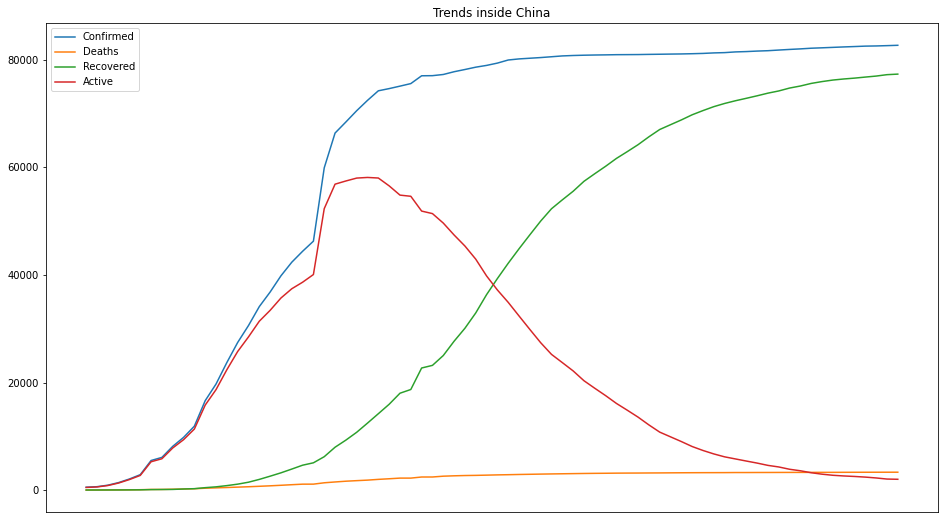

In [43]:
## Let's take a look at trends within china and outside china
import matplotlib.dates as mdates
date_df_china = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
date_df_china['Date'] = date_df_china['Date'].dt.strftime('%m/%d/%Y')
date_df_china = date_df_china.sort_values(by='Date', ascending=True)
date_df_not_china = not_china.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
date_df_not_china['Date'] = date_df_not_china['Date'].dt.strftime('%m/%d/%Y')
date_df_not_china = date_df_not_china.sort_values(by='Date', ascending=True)

#Within China
plt.plot(date_df_china['Date'], date_df_china['Confirmed'], label='Confirmed')
plt.plot(date_df_china['Date'], date_df_china['Deaths'], label='Deaths')
plt.plot(date_df_china['Date'], date_df_china['Recovered'], label='Recovered')
plt.plot(date_df_china['Date'], date_df_china['Active'], label='Active')
plt.legend(loc="upper left")
plt.title("Trends inside China")
plt.rcParams["figure.figsize"] = [12,8]
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.show()

Text(0.5, 1.0, 'Trends outside China')

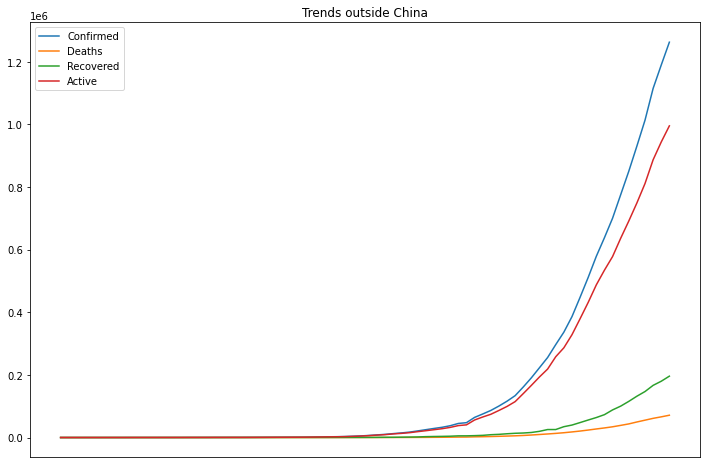

In [45]:
#Outside China
plt.plot(date_df_not_china['Date'], date_df_not_china['Confirmed'], label='Confirmed')
plt.plot(date_df_not_china['Date'], date_df_not_china['Deaths'], label='Deaths')
plt.plot(date_df_not_china['Date'], date_df_not_china['Recovered'], label='Recovered')
plt.plot(date_df_not_china['Date'], date_df_not_china['Active'], label='Active')
plt.legend(loc="upper left")
plt.title("Trends outside China")
plt.rcParams["figure.figsize"] = [12,8]
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.show()

In [46]:
## Visualize the daily spread of virus in Hubei, Rest of China and rest of the world
def location(row):
    if row['Country/Region']=='China':
        if row['Province/State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese Provinces'
    else:
        return 'Rest of the World'

temp = cor.copy()
temp['Region'] = temp.apply(location, axis=1)
temp['Date'] = temp['Date'].dt.strftime('%Y-%m-%d')
temp = temp.groupby(['Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars=['Region', 'Date'], value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')

fig = px.bar(temp, y='Count', x='Region', color='Case', barmode='group',
             text='Count', title='Hubei - China - World', animation_frame='Date',
             color_discrete_sequence= px.colors.qualitative.G10, range_y=[0, 400000])
fig = fig.update_traces(textposition='outside')
fig = fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig = fig.update_layout(xaxis={'categoryorder':'array', 
                         'categoryarray':['Hubei','Other Chinese Provinces','Rest of the World']})
fig.show()

Text(0.5, 1.0, 'Countries vs Confirmed cases')

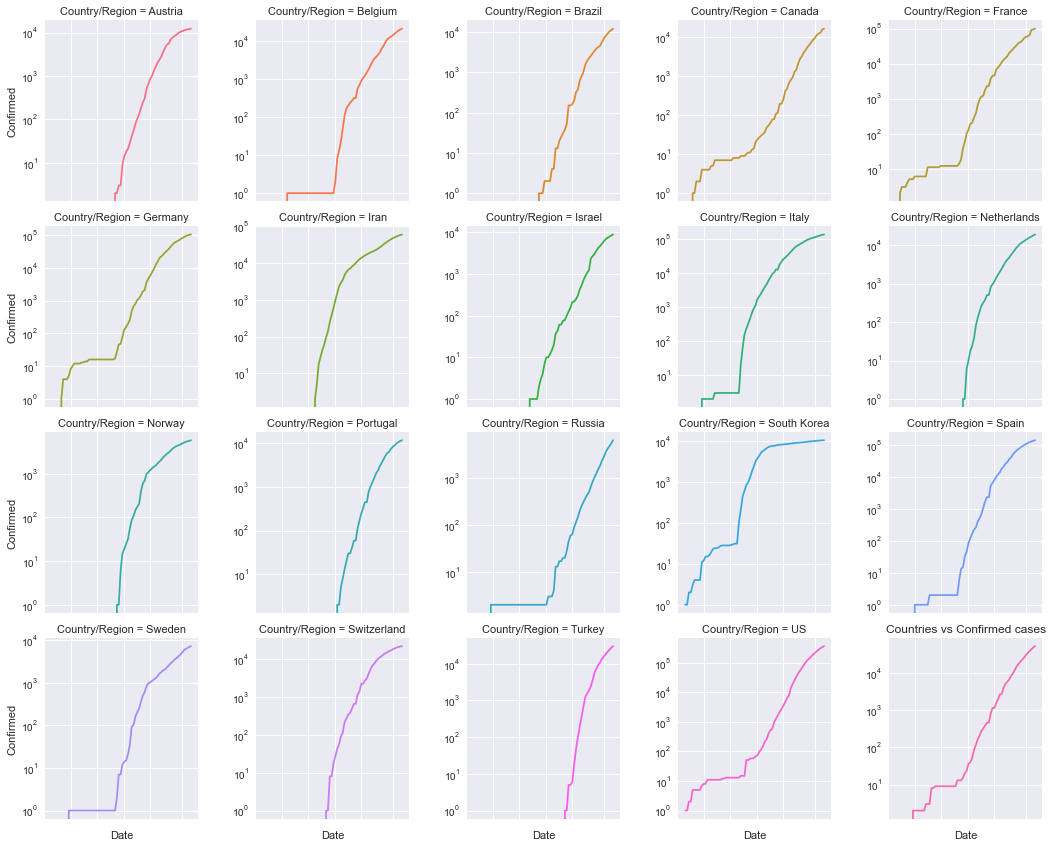

In [47]:
## The spread of disease in top 20 countries outside china. We use log of confirmed cases instead of just cases as
## logarithmic distribution spreads more evenly
top20 = full_latest_grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
top20 = top20.head(21)
top20 = list(top20['Country/Region'][:21])
top20.remove('China')

gr = cor.groupby(['Date','Country/Region'])['Confirmed'].sum().reset_index().sort_values(by=['Date','Country/Region'])
gr = gr[gr['Country/Region'].isin(top20)]

plt.style.use('seaborn')
g = sn.FacetGrid(gr, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed").set(yscale='log')
g.set_xticklabels(rotation=90)
plt.title('Countries vs Confirmed cases')
plt.show()

In [48]:
## The spread of disease in top 20 countries outside china
top20 = full_latest_grouped.sort_values('Confirmed', ascending=False).reset_index(drop=True)
top20 = top20.head(21)
top20 = list(top20['Country/Region'][:21])
top20.remove('China')

gr = cor.groupby(['Date','Country/Region'])['Confirmed'].sum().reset_index().sort_values(by=['Date','Country/Region'])
gr = gr[gr['Country/Region'].isin(top20)]

fig = px.line(gr, x='Date', y='Confirmed', facet_col='Country/Region', facet_col_wrap=5)
fig = fig.update_yaxes(matches=None)
fig.show()

In [44]:
## Time series modelling to forecast the trends of the disease
from fbprophet import Prophet
conf = cor.groupby('Date')['Confirmed'].sum().reset_index()
conf.columns = ['ds','y']
dea = cor.groupby('Date')['Deaths'].sum().reset_index()
dea.columns = ['ds','y']
rec = cor.groupby('Date')['Recovered'].sum().reset_index()
rec.columns = ['ds','y']

m_conf = Prophet(interval_width=0.95)
m_conf.fit(conf)
future_conf = m_conf.make_future_dataframe(periods=14)
forecast_conf = m_conf.predict(future_conf)

m_dea = Prophet(interval_width=0.95)
m_dea.fit(dea)
future_dea = m_dea.make_future_dataframe(periods=14)
forecast_dea = m_dea.predict(future_dea)

m_rec = Prophet(interval_width=0.95)
m_rec.fit(rec)
future_rec = m_rec.make_future_dataframe(periods=14)
forecast_rec = m_rec.predict(future_rec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat     yhat_lower     yhat_upper
74 2020-04-05  703561.755468  665654.842146  744514.930485
75 2020-04-06  729042.187341  683832.280836  776992.722717
76 2020-04-07  754974.462825  705339.858088  803789.105309
77 2020-04-08  782674.166706  726680.614559  836559.505199
78 2020-04-09  812426.132968  755908.669109  872457.392216

Text(0.5, 1.0, '2 week forecast of confirmed cases')

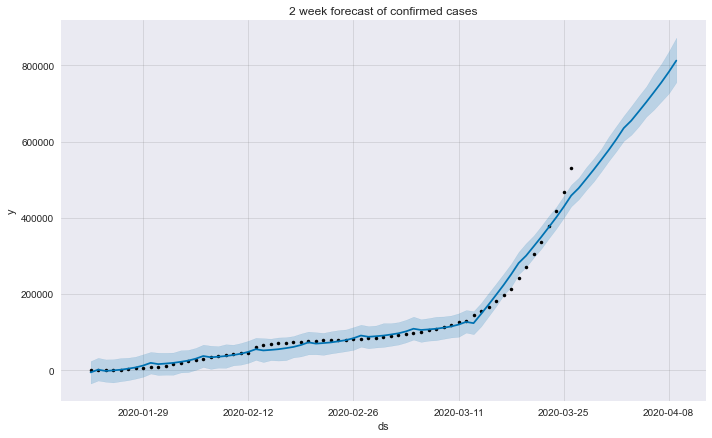

In [45]:
forecast_conf[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
conf_plot = m_conf.plot(forecast_conf)
plt.title('2 week forecast of confirmed cases')
plt.show()

ds           yhat     yhat_lower     yhat_upper
74 2020-04-05  142340.752689  136523.935804  147860.759603
75 2020-04-06  144913.018469  138857.310520  151044.859038
76 2020-04-07  148626.450331  142522.636649  154775.289910
77 2020-04-08  152067.670058  145382.563030  159325.828158
78 2020-04-09  155510.438671  148142.568343  162576.267737

Text(0.5, 1.0, '2 week forecast of recoveries')

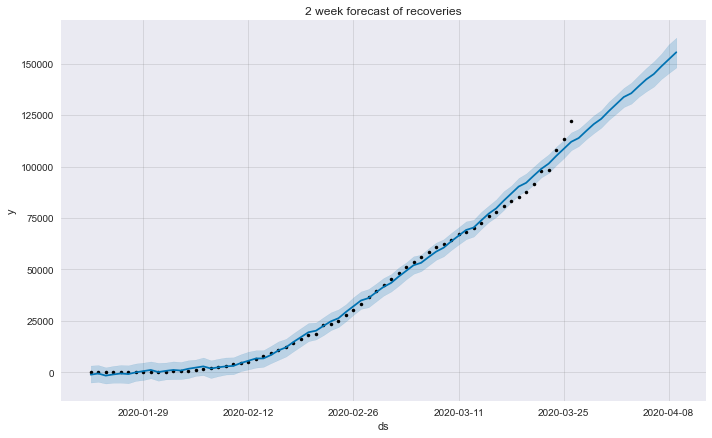

In [46]:
forecast_rec[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
rec_plot = m_rec.plot(forecast_rec)
plt.title('2 week forecast of recoveries')
plt.show()

ds          yhat    yhat_lower    yhat_upper
74 2020-04-05  32431.415191  30323.036899  34516.275678
75 2020-04-06  33678.428440  31362.054876  35942.148619
76 2020-04-07  34971.054624  32491.485445  37441.937056
77 2020-04-08  36358.900318  33666.509508  38828.200053
78 2020-04-09  37733.156324  34675.913663  40768.493977

Text(0.5, 1.0, '2 week forecast of deaths')

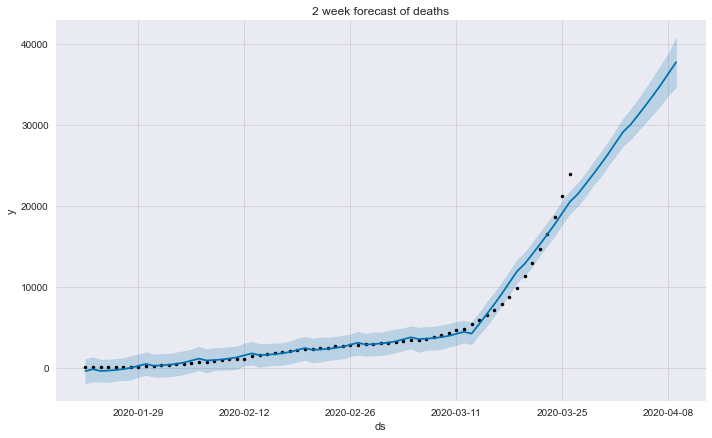

In [47]:
forecast_dea[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
dea_plot = m_dea.plot(forecast_dea)
plt.title('2 week forecast of deaths')
plt.show()

In [1]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/saimithun-95/covid-19


'https://jovian.ai/saimithun-95/covid-19'